In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [61]:
df_loan = pd.read_csv(r"https://raw.githubusercontent.com/Lingdoc83/Innopolis/refs/heads/main/Loan%20Eligibility%20Prediction.csv")

# Протестируем гипотезу о том, что люди с заработной платой до 3500 берут сумму кредита меньше, чем люди с зарплатой более 3500.

In [62]:
df_loan

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [63]:
# Выбираем в таблицу данные с одобренным кредитом

In [64]:
df_loan = df_loan[df_loan['Loan_Status']=='Y']

# Поиск пропусков

In [65]:
df_loan.duplicated().unique()

array([False])

In [66]:
# Пропуски не обнаружены

# Выбросы

In [67]:
df_loan['Loan_Amount'].describe()

count    422.000000
mean     141.182464
std       86.487830
min       15.000000
25%       99.000000
50%      125.000000
75%      160.000000
max      700.000000
Name: Loan_Amount, dtype: float64

<Axes: >

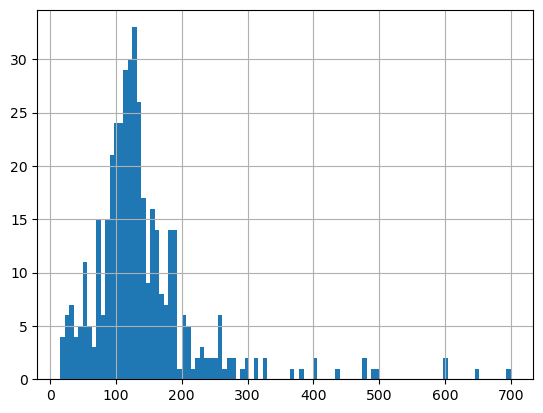

In [68]:
df_loan['Loan_Amount'].hist(bins = 100)

In [69]:
q1 = df_loan['Loan_Amount'].quantile(0.25)
q3 = df_loan['Loan_Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Выбросами будут считаться сумма кредита, у которых значение находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться сумма кредита, у которых значение находится за пределами интервала [7.5, 251.5]


# Выводим таблицу выбросов

In [70]:
df_loan[(df_loan['Loan_Amount']<=lower_bound)|(df_loan['Loan_Amount']>=upper_bound)]

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
540,612,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
541,160,Male,Yes,0,Graduate,No,4583,5625.0,255,360,1,Semiurban,Y
543,256,Female,No,4,Graduate,No,3083,0.0,255,360,1,Rural,Y
546,120,Female,No,0,Graduate,No,10408,0.0,259,360,1,Urban,Y
547,349,Male,Yes,0,Graduate,No,6333,4583.0,259,360,1,Semiurban,Y
549,558,Male,Yes,4,Graduate,Yes,10139,0.0,260,360,1,Semiurban,Y
550,595,Male,Yes,0,Graduate,Yes,16120,0.0,260,360,1,Urban,Y
552,6,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
554,392,Male,Yes,4,Graduate,No,9504,0.0,275,360,1,Rural,Y
555,573,Male,Yes,2,Graduate,No,16666,0.0,275,360,1,Urban,Y


# Таблица без выбросов

In [71]:
df_loan = df_loan[(df_loan['Loan_Amount']>=lower_bound)&(df_loan['Loan_Amount']<=upper_bound)]

In [72]:
df_loan

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
5,148,Male,Yes,1,Graduate,No,1538,1425.0,30,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,128,Male,No,0,Graduate,No,3865,1640.0,22,360,1,Rural,Y
604,323,Male,Yes,2,Not Graduate,No,3601,1590.0,15,360,1,Rural,Y
607,436,Female,No,0,Graduate,No,10047,0.0,30,240,1,Semiurban,Y
608,438,Male,Yes,0,Graduate,No,2213,1125.0,20,360,1,Urban,Y


In [73]:
df_loan1 = df_loan.loc[df_loan['Applicant_Income']<=3500, 'Loan_Amount']
df_loan2 = df_loan.loc[df_loan['Applicant_Income']>3500, 'Loan_Amount']

alpha = 0.95

mean_1 = df_loan1.mean()
var_1 = df_loan1.var()
n_1 = df_loan1.count()

ci_1 = stats.norm.interval(confidence = alpha, loc = mean_1, scale = np.sqrt(var_1/n_1))
print(f'95% доверительный интервал для средней зп до 3500 от {ci_1[0].round(2)} до {ci_1[1].round(2)} млн кред. суммы')

mean_2 = df_loan2.mean()
var_2 = df_loan2.var()
n_2 = df_loan2.count()

ci_2 = stats.norm.interval(confidence = alpha, loc = mean_2, scale = np.sqrt(var_2/n_2))
print(f'95% доверительный интервал для средней свыше 3500 от {ci_2[0].round(2)} до {ci_2[1].round(2)} млн кред. суммы')

95% доверительный интервал для средней зп до 3500 от 101.51 до 112.33 млн кред. суммы
95% доверительный интервал для средней свыше 3500 от 129.37 до 142.61 млн кред. суммы


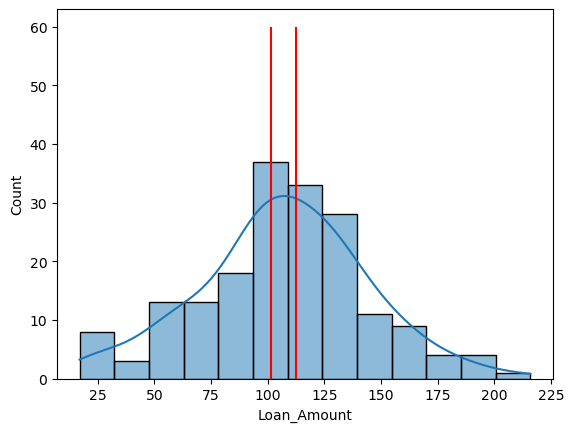

In [74]:
fig = plt.figure()
sns.histplot(df_loan1[df_loan1<300], kde = True)
plt.vlines(x = ci_1[0], ymin = 0, ymax = 60, color = 'r')
plt.vlines(x = ci_1[1], ymin = 0, ymax = 60, color = 'r')
plt.show()

# Тесты на нормальность распределения

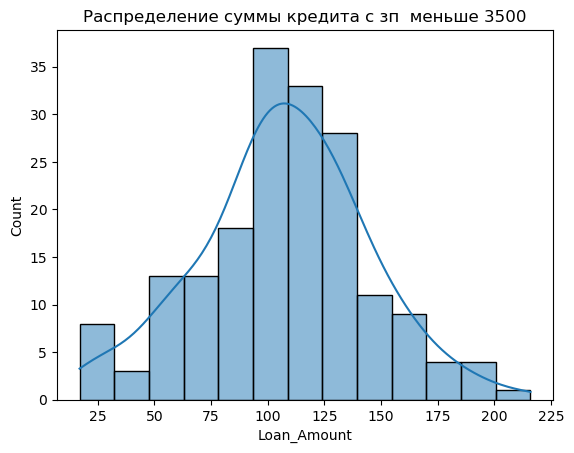

In [76]:
fig = plt.figure()
plt.title('Распределение суммы кредита с зп  меньше 3500')
sns.histplot(df_loan1[df_loan1<300], kde = True)
plt.show()

# Тест Андерсона-Дарлинга

In [77]:
stats.anderson(df_loan1[df_loan1<300], dist='norm')

AndersonResult(statistic=0.42940079478040616, critical_values=array([0.564, 0.642, 0.771, 0.899, 1.069]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=106.92307692307692, scale=37.24911827922489)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Для уровня значимости 0,05 критическое значение составляет 0,775, а наблюдаемое значение 0,47

Наблюдаемая статистика меньше критического значения <= отвергаем нулевую гипотезу

# Альтернативные методы тестирования нормальности распределения суммы кредита среди зп до 3500 и свыше 3500

In [80]:
df_loan1 = df_loan.loc[(df_loan['Applicant_Income']<=3500)&(df_loan['Loan_Amount']<300), 'Loan_Amount']
df_loan2 = df_loan.loc[(df_loan['Applicant_Income']>3500)&(df_loan['Loan_Amount']<300), 'Loan_Amount']

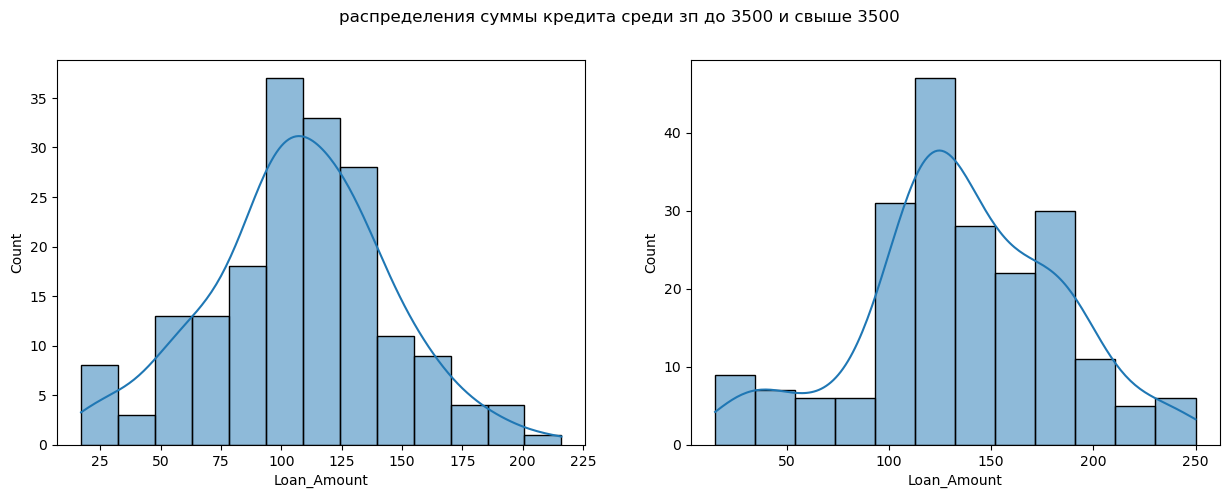

In [81]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('распределения суммы кредита среди зп до 3500 и свыше 3500')
sns.histplot(df_loan1, kde = True, ax = ax[0])
sns.histplot(df_loan2, kde = True, ax = ax[1])
plt.show()

In [82]:
print('Средняя: ', df_loan1.mean())
print('Медиана: ', df_loan1.median())
print('Скошенность: ', stats.skew(df_loan1))
print('Эксцесс: ', stats.kurtosis(df_loan1))

Средняя:  106.92307692307692
Медиана:  108.0
Скошенность:  -0.053304201052846265
Эксцесс:  0.12055235307807255


In [83]:
print('Средняя: ', df_loan2.mean())
print('Медиана: ', df_loan2.median())
print('Скошенность: ', stats.skew(df_loan2))
print('Эксцесс: ', stats.kurtosis(df_loan2))

Средняя:  135.9903846153846
Медиана:  132.0
Скошенность:  -0.18827055890996547
Эксцесс:  0.0626046469985111


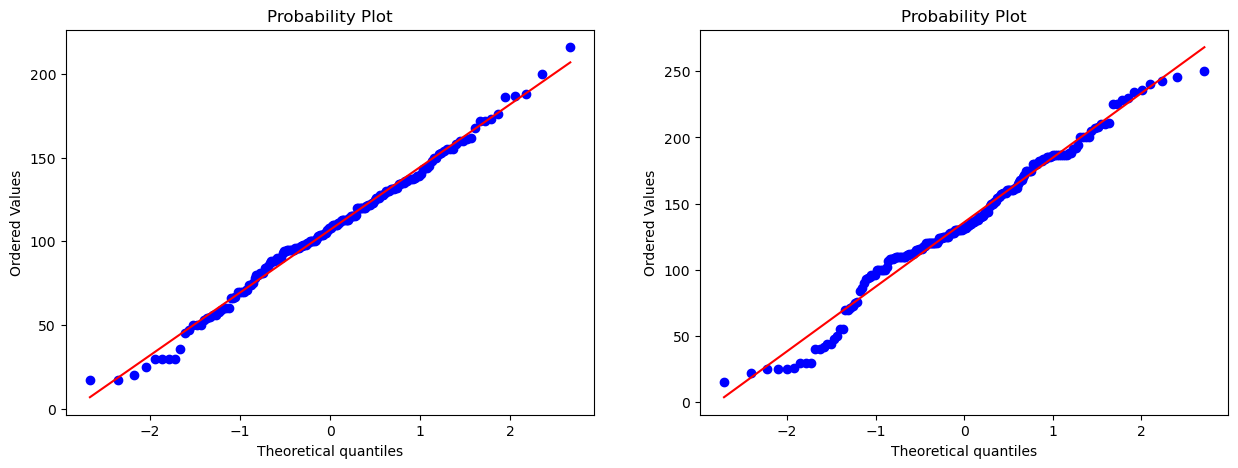

In [85]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot для зп 3500 и более 3500')
stats.probplot(df_loan1, dist="norm", plot = ax[0])
stats.probplot(df_loan2, dist="norm", plot = ax[1])
plt.show()

### Тест Манна-Уитни о равенстве цен на 1к и 2к квартиры

In [86]:
df_loan1 = df_loan.loc[(df_loan['Applicant_Income']<=3500)&(df_loan['Loan_Amount']<300), 'Loan_Amount']
df_loan2 = df_loan.loc[(df_loan['Applicant_Income']>3500)&(df_loan['Loan_Amount']<300), 'Loan_Amount']

In [87]:
stats.mannwhitneyu(df_loan1, df_loan2, alternative = 'two-sided')

MannwhitneyuResult(statistic=11585.5, pvalue=3.802292393057964e-11)

In [89]:
#Поскольку р-значение существенно меньше 5%, нулевая гипотеза теста о том, что суммы кредита при зп до 3500 и более 3500
#совпадают (в т.ч., что совпадают их медианы), отвергается. Суммы кредита при зп до 3500 и более 3500 не равны!

### Коэффициенты корреляции Пирсона и Спирмана

In [90]:
stats.pearsonr(df_loan['Applicant_Income'], df_loan['Loan_Amount'])

PearsonRResult(statistic=0.22367538094538636, pvalue=8.208018132168869e-06)

In [91]:
stats.spearmanr(df_loan['Applicant_Income'], df_loan['Loan_Amount'])

SignificanceResult(statistic=0.4092639761425557, pvalue=3.505239656429946e-17)

### Линейная регрессия зарплаты на сумму кредита

In [95]:
X = np.array(df_loan['Applicant_Income'])
Y = np.array(df_loan['Loan_Amount'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.43
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           8.21e-06
Time:                        19:25:36   Log-Likelihood:                -2036.5
No. Observations:                 390   AIC:                             4077.
Df Residuals:                     388   BIC:                             4085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.4724      3.659     29.917      0.0